In [27]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd

In [28]:
# read state highway system
shs=gpd.read_file('C:/GIS/AADT Analysis/SHS.json')
shs_proj_link=shs.to_crs("EPSG:3310")
shs_proj=shs.to_crs("EPSG:3310")
shs_proj.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,geometry
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,8.147,None,8.425,10.969,Right,State,"MULTILINESTRING ((195970.763 -453881.549, 1960..."
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,49.420,None,41.613,91.033,Right,State,"MULTILINESTRING ((330353.418 -240641.285, 3303..."
2,xc453kn9742.3,0.141689,15,None,15,15_20080130_R,SBD,8,R,13.779,22.891,None,123.148,132.260,Right,Interstate,"MULTILINESTRING ((238606.843 -417929.525, 2385..."
3,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,0.273,None,0.000,0.273,Right,State,"MULTILINESTRING ((422959.785 -584084.468, 4229..."
4,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,27.086,None,257.761,284.847,Left,State,"MULTILINESTRING ((-89959.217 -78674.661, -8999..."


In [29]:
shs_proj.columns

Index(['id', 'shape_leng', 'route', 'rtesuffix', 'routes', 'routeid', 'county',
       'district', 'pmprefix', 'bpm', 'epm', 'pmsuffix', 'bodometer',
       'eodometer', 'aligncode', 'routetype', 'geometry'],
      dtype='object')

In [30]:
# read aadt file
aadt=gpd.read_file('C:/GIS/AADT Analysis/Truck__Volumes_AADT.geojson')

# project the shape file to meter co-ordinate system
aadt_proj=aadt.to_crs("EPSG:3310")
aadt.head()

,OBJECTID,RTE,RTE_SFX,DIST,CNTY,PM_PFX,POSTMILE,PM_SFX,LEG,DESCRIPTION,...,TRK_3_AXLE,TRK_3_AXLE_PCT,TRK_4_AXLE,TRK_4_AXLE_PCT,TRK_5_AXLE,TRK_5_AXLE_PCT,EAL,EST_VER_YEAR,EST_VER_CODE,geometry
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,1126,47.32,319,13.39,128,5.36,223,18,E,POINT (-117.66993 33.4671)
1,2,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,1126,47.32,319,13.39,128,5.36,223,18,E,POINT (-117.66982 33.46701)
2,3,1,,12,ORA,R,0.78,,A,"DANA POINT, DOHENY PARK ROAD",...,896,47.32,254,13.39,102,5.36,177,3,E,POINT (-117.67888 33.46418)
3,4,1,,12,ORA,R,0.78,,A,"DANA POINT, DOHENY PARK ROAD",...,896,47.32,254,13.39,102,5.36,177,3,E,POINT (-117.67892 33.46408)
4,5,1,,12,ORA,,9.418,,B,"LAGUNA BEACH, JCT. RTE. 133 NORTH",...,310,45.98,62,9.2,39,5.75,60,19,E,POINT (-117.78533 33.54274)


In [31]:
aadt.columns

Index(['OBJECTID', 'RTE', 'RTE_SFX', 'DIST', 'CNTY', 'PM_PFX', 'POSTMILE',
       'PM_SFX', 'LEG', 'DESCRIPTION', 'VEHICLE_AADT_TOTAL', 'TOT_TRK_AADT',
       'TRK_PERCENT_TOT', 'TRK_2_AXLE', 'TRK_2_AXLE_PCT', 'TRK_3_AXLE',
       'TRK_3_AXLE_PCT', 'TRK_4_AXLE', 'TRK_4_AXLE_PCT', 'TRK_5_AXLE',
       'TRK_5_AXLE_PCT', 'EAL', 'EST_VER_YEAR', 'EST_VER_CODE', 'geometry'],
      dtype='object')

In [32]:
# check the CRS for both file
aadt.crs, shs.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [33]:
# consider 30 meter buffer around the link
shs_proj['geometry'] = shs_proj.buffer(30)
shs_proj.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,geometry
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,8.147,None,8.425,10.969,Right,State,"POLYGON ((196008.025 -453849.722, 196050.575 -..."
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,49.420,None,41.613,91.033,Right,State,"POLYGON ((330319.906 -240637.031, 330319.026 -..."
2,xc453kn9742.3,0.141689,15,None,15,15_20080130_R,SBD,8,R,13.779,22.891,None,123.148,132.260,Right,Interstate,"POLYGON ((238558.605 -417931.303, 238557.741 -..."
3,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,0.273,None,0.000,0.273,Right,State,"POLYGON ((422934.625 -584103.667, 422931.245 -..."
4,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,27.086,None,257.761,284.847,Left,State,"POLYGON ((-90657.764 -76480.595, -90658.233 -7..."


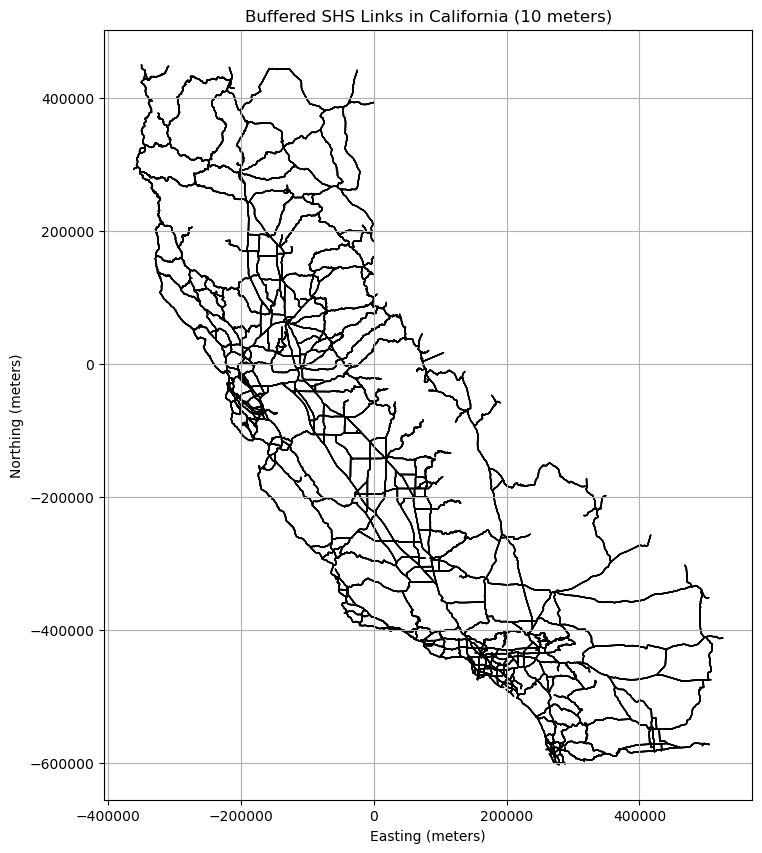

In [34]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
shs_proj.plot(ax=ax, color="lightblue", edgecolor="black")

# Customize the plot
ax.set_title("Buffered SHS Links in California (10 meters)")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
plt.grid(True)
plt.show()

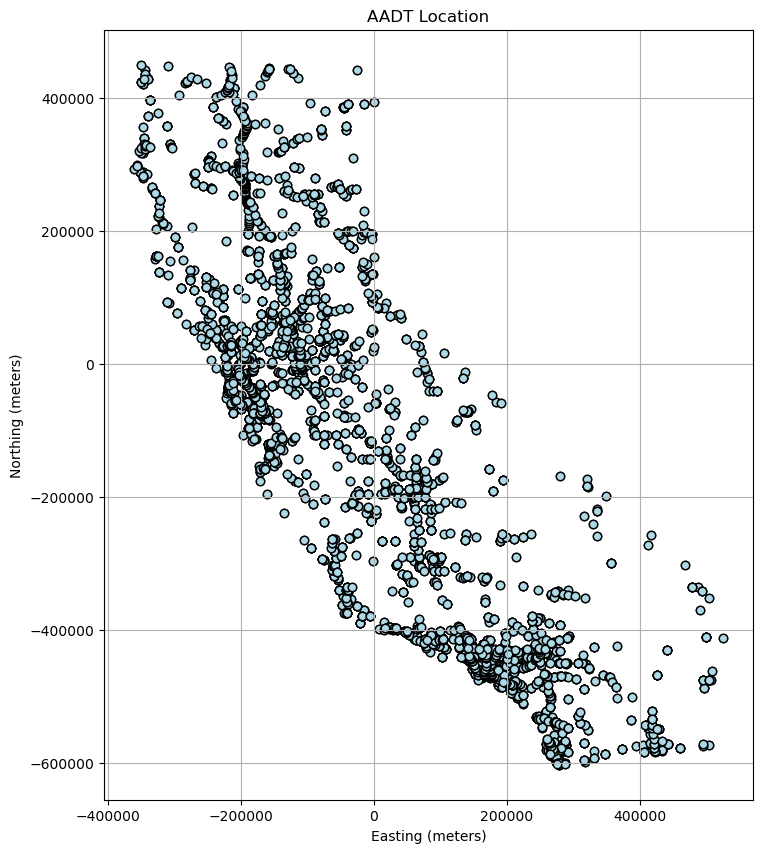

In [35]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
aadt_proj.plot(ax=ax, color="lightblue", edgecolor="black")
# Customize the plot
ax.set_title("AADT Location")
ax.set_xlabel("Easting (meters)")
ax.set_ylabel("Northing (meters)")
plt.grid(True)
plt.show()

<Axes: >

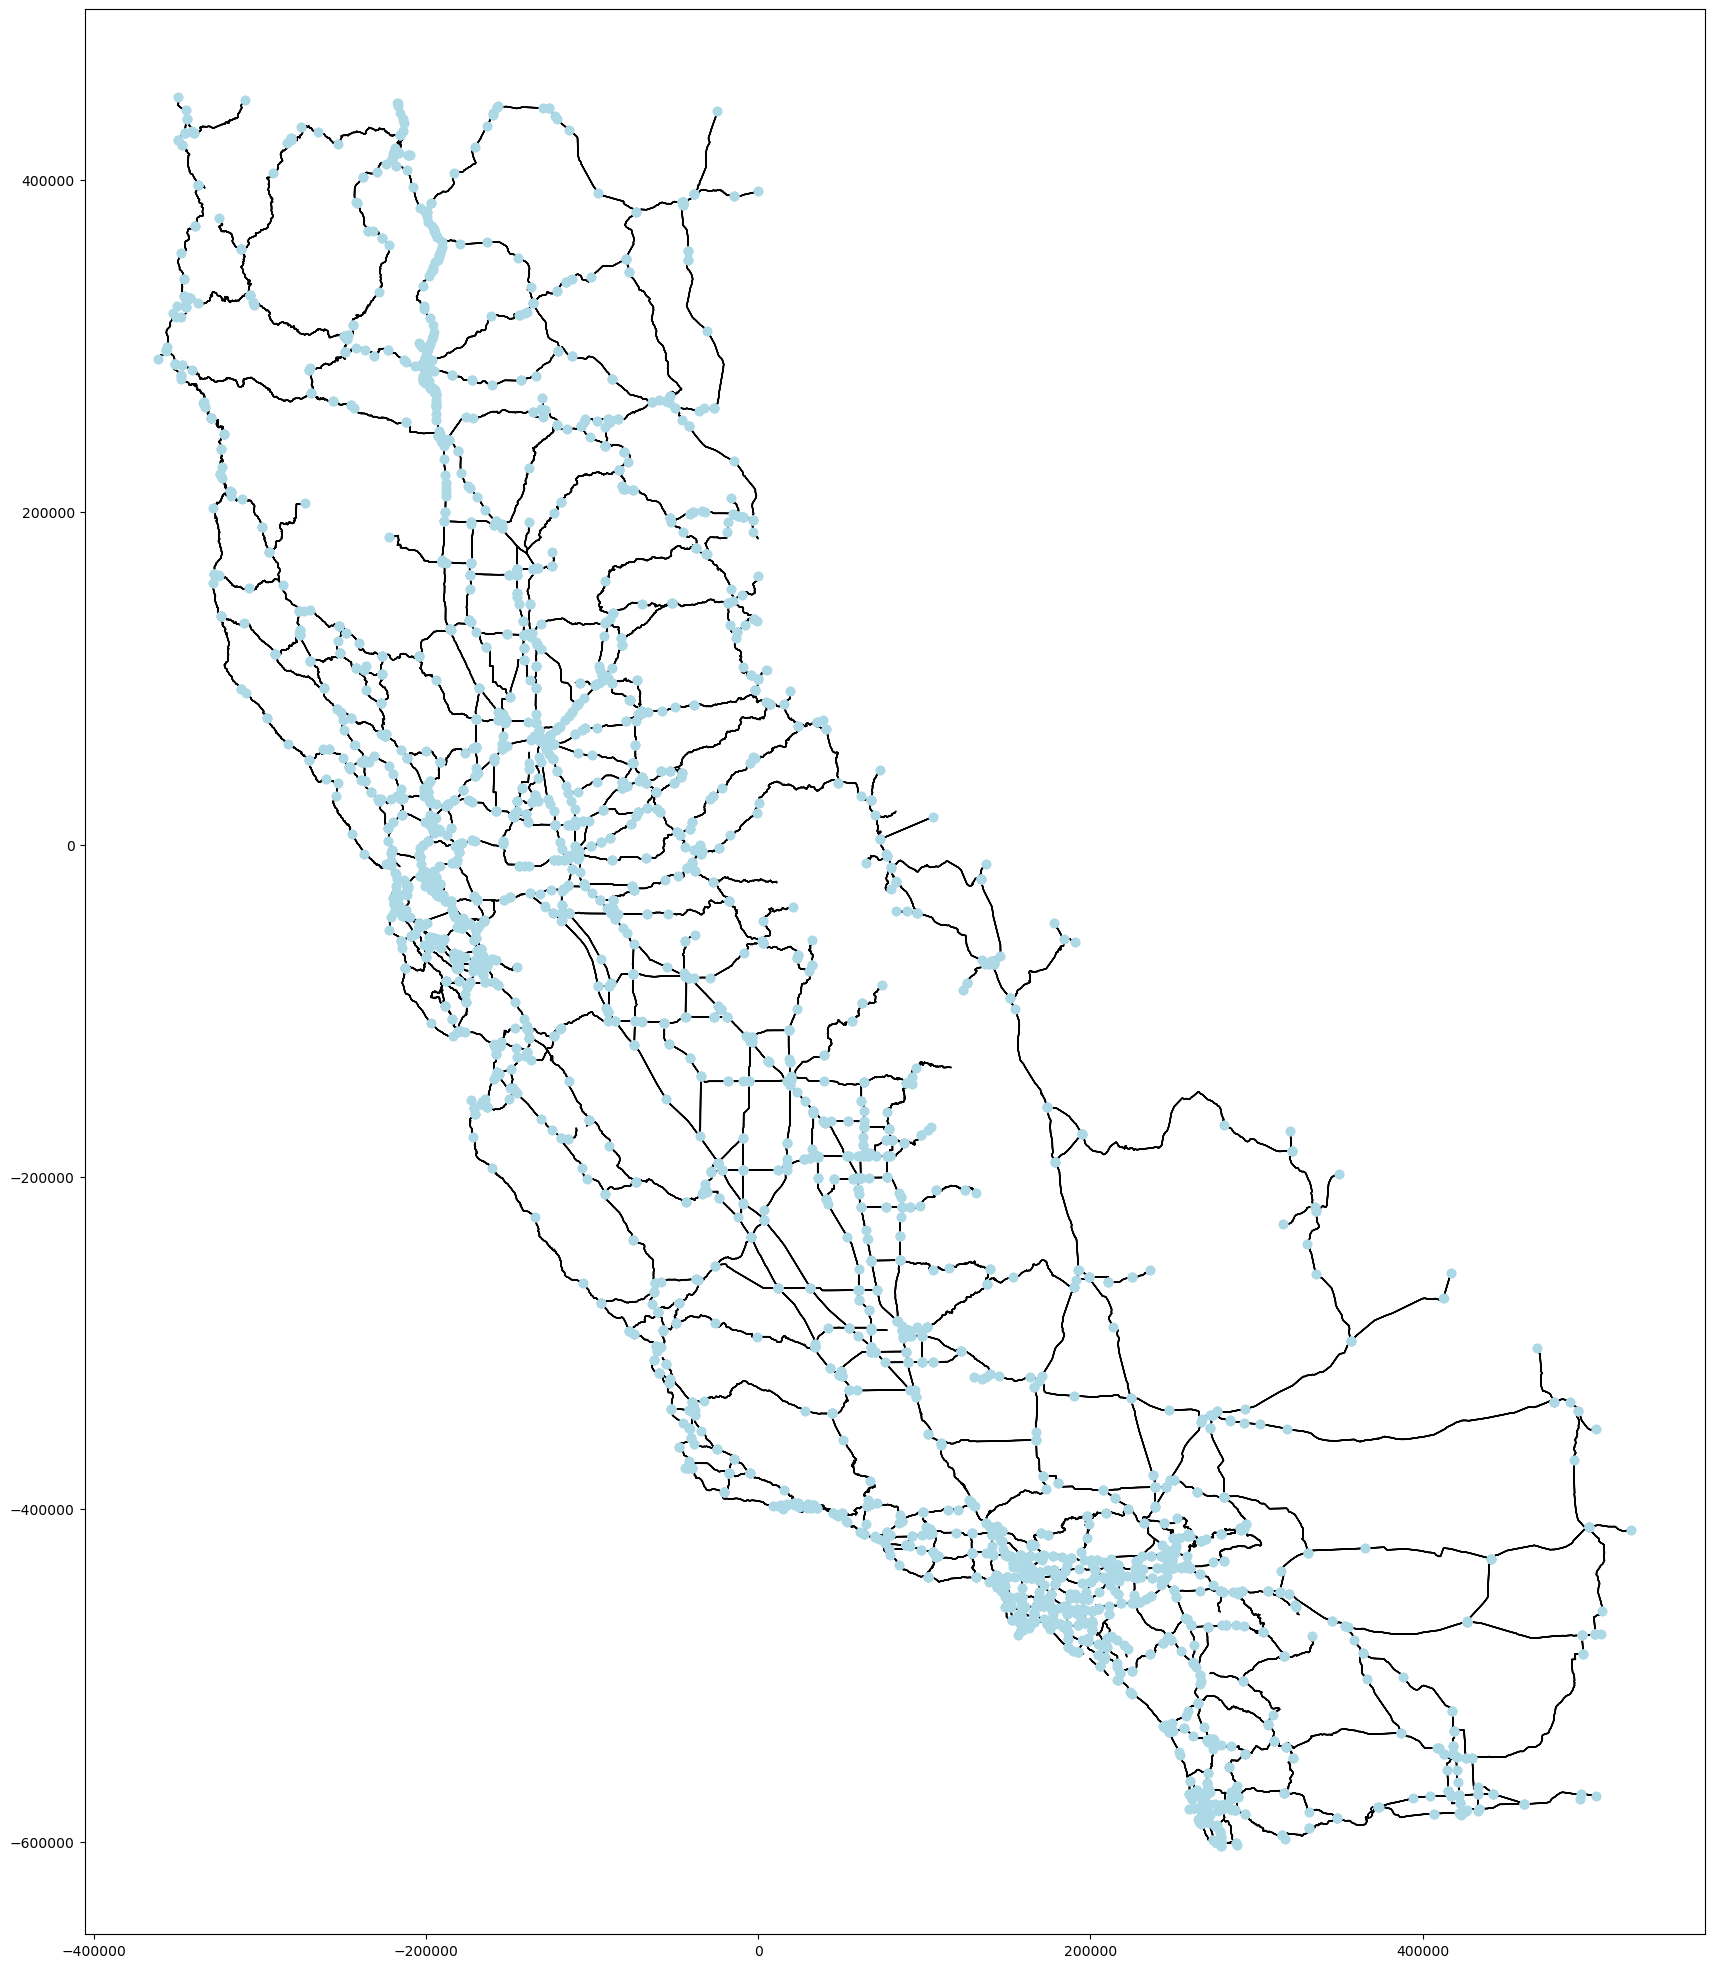

In [36]:
fig, ax = plt.subplots(figsize = (30,25)) 
shs_proj.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
aadt_proj.plot(color="lightblue",ax=ax) #Use your second dataframe

In [37]:
#Now do the spatial join with aadt point data
shs_aadt_joined = gpd.sjoin(aadt_proj, shs_proj, predicate="within", how="inner")
shs_aadt_joined['DIST'] = pd.to_numeric(shs_aadt_joined['DIST'], errors='coerce')
shs_aadt_joined['RTE'] = pd.to_numeric(shs_aadt_joined['RTE'], errors='coerce')
shs_aadt_joined.head()

,OBJECTID,RTE,RTE_SFX,DIST,CNTY,PM_PFX,POSTMILE,PM_SFX,LEG,DESCRIPTION,...,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,ORA,12,R,0.129,1.077,None,0.000,0.948,Left,State
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,ORA,12,None,0.000,23.259,None,71.980,95.239,Left,Interstate
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,ORA,12,R,0.129,1.077,None,0.000,0.948,Right,State
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,ORA,12,None,0.000,23.259,None,72.043,95.302,Right,Interstate
1,2,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,ORA,12,R,0.129,1.077,None,0.000,0.948,Left,State


In [38]:
shs_aadt_joined.dtypes

OBJECTID                 int32
RTE                      int64
RTE_SFX                 object
DIST                     int64
CNTY                    object
PM_PFX                  object
POSTMILE                object
PM_SFX                  object
LEG                     object
DESCRIPTION             object
VEHICLE_AADT_TOTAL      object
TOT_TRK_AADT            object
TRK_PERCENT_TOT         object
TRK_2_AXLE              object
TRK_2_AXLE_PCT          object
TRK_3_AXLE              object
TRK_3_AXLE_PCT          object
TRK_4_AXLE              object
TRK_4_AXLE_PCT          object
TRK_5_AXLE              object
TRK_5_AXLE_PCT          object
EAL                     object
EST_VER_YEAR            object
EST_VER_CODE            object
geometry              geometry
index_right              int64
id                      object
shape_leng             float64
route                    int32
rtesuffix               object
routes                  object
routeid                 object
county  

In [39]:
# check the data shape
shs_aadt_joined.shape, shs_proj.shape, aadt_proj.shape

((20551, 42), (5092, 17), (6875, 25))

In [40]:
# Now filter out more based on route, county, district, and PM prefix to avoid any mis match
def qc(shs_proj, aadt_proj):
    # Check if the specified columns match between the two dataframes
    if (shs_proj['route'] == aadt_proj['RTE'] and
        shs_proj['county'] == aadt_proj['CNTY'] and
        shs_proj['district'] == aadt_proj['DIST']): #and
        #shs_proj['pmprefix'] == aadt_proj['PM_PFX']): # and
        #shs_proj['pmsuffix'] == aadt_proj['PM_SFX']):
        return True
    else:
        return False
    

In [41]:
# Apply the QC function to each row of the GeoDataFrame
shs_aadt_joined['Qualified'] = shs_aadt_joined.apply(lambda row: qc(row, row), axis=1)
shs_aadt_joined.head()

,OBJECTID,RTE,RTE_SFX,DIST,CNTY,PM_PFX,POSTMILE,PM_SFX,LEG,DESCRIPTION,...,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,Qualified
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,R,0.129,1.077,None,0.000,0.948,Left,State,True
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,None,0.000,23.259,None,71.980,95.239,Left,Interstate,False
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,R,0.129,1.077,None,0.000,0.948,Right,State,True
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,None,0.000,23.259,None,72.043,95.302,Right,Interstate,False
1,2,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,R,0.129,1.077,None,0.000,0.948,Left,State,True


In [42]:
shs_aadt_joined.groupby(['Qualified'])['Qualified'].count()

Qualified
False     7546
True     13005
Name: Qualified, dtype: int64

<Axes: >

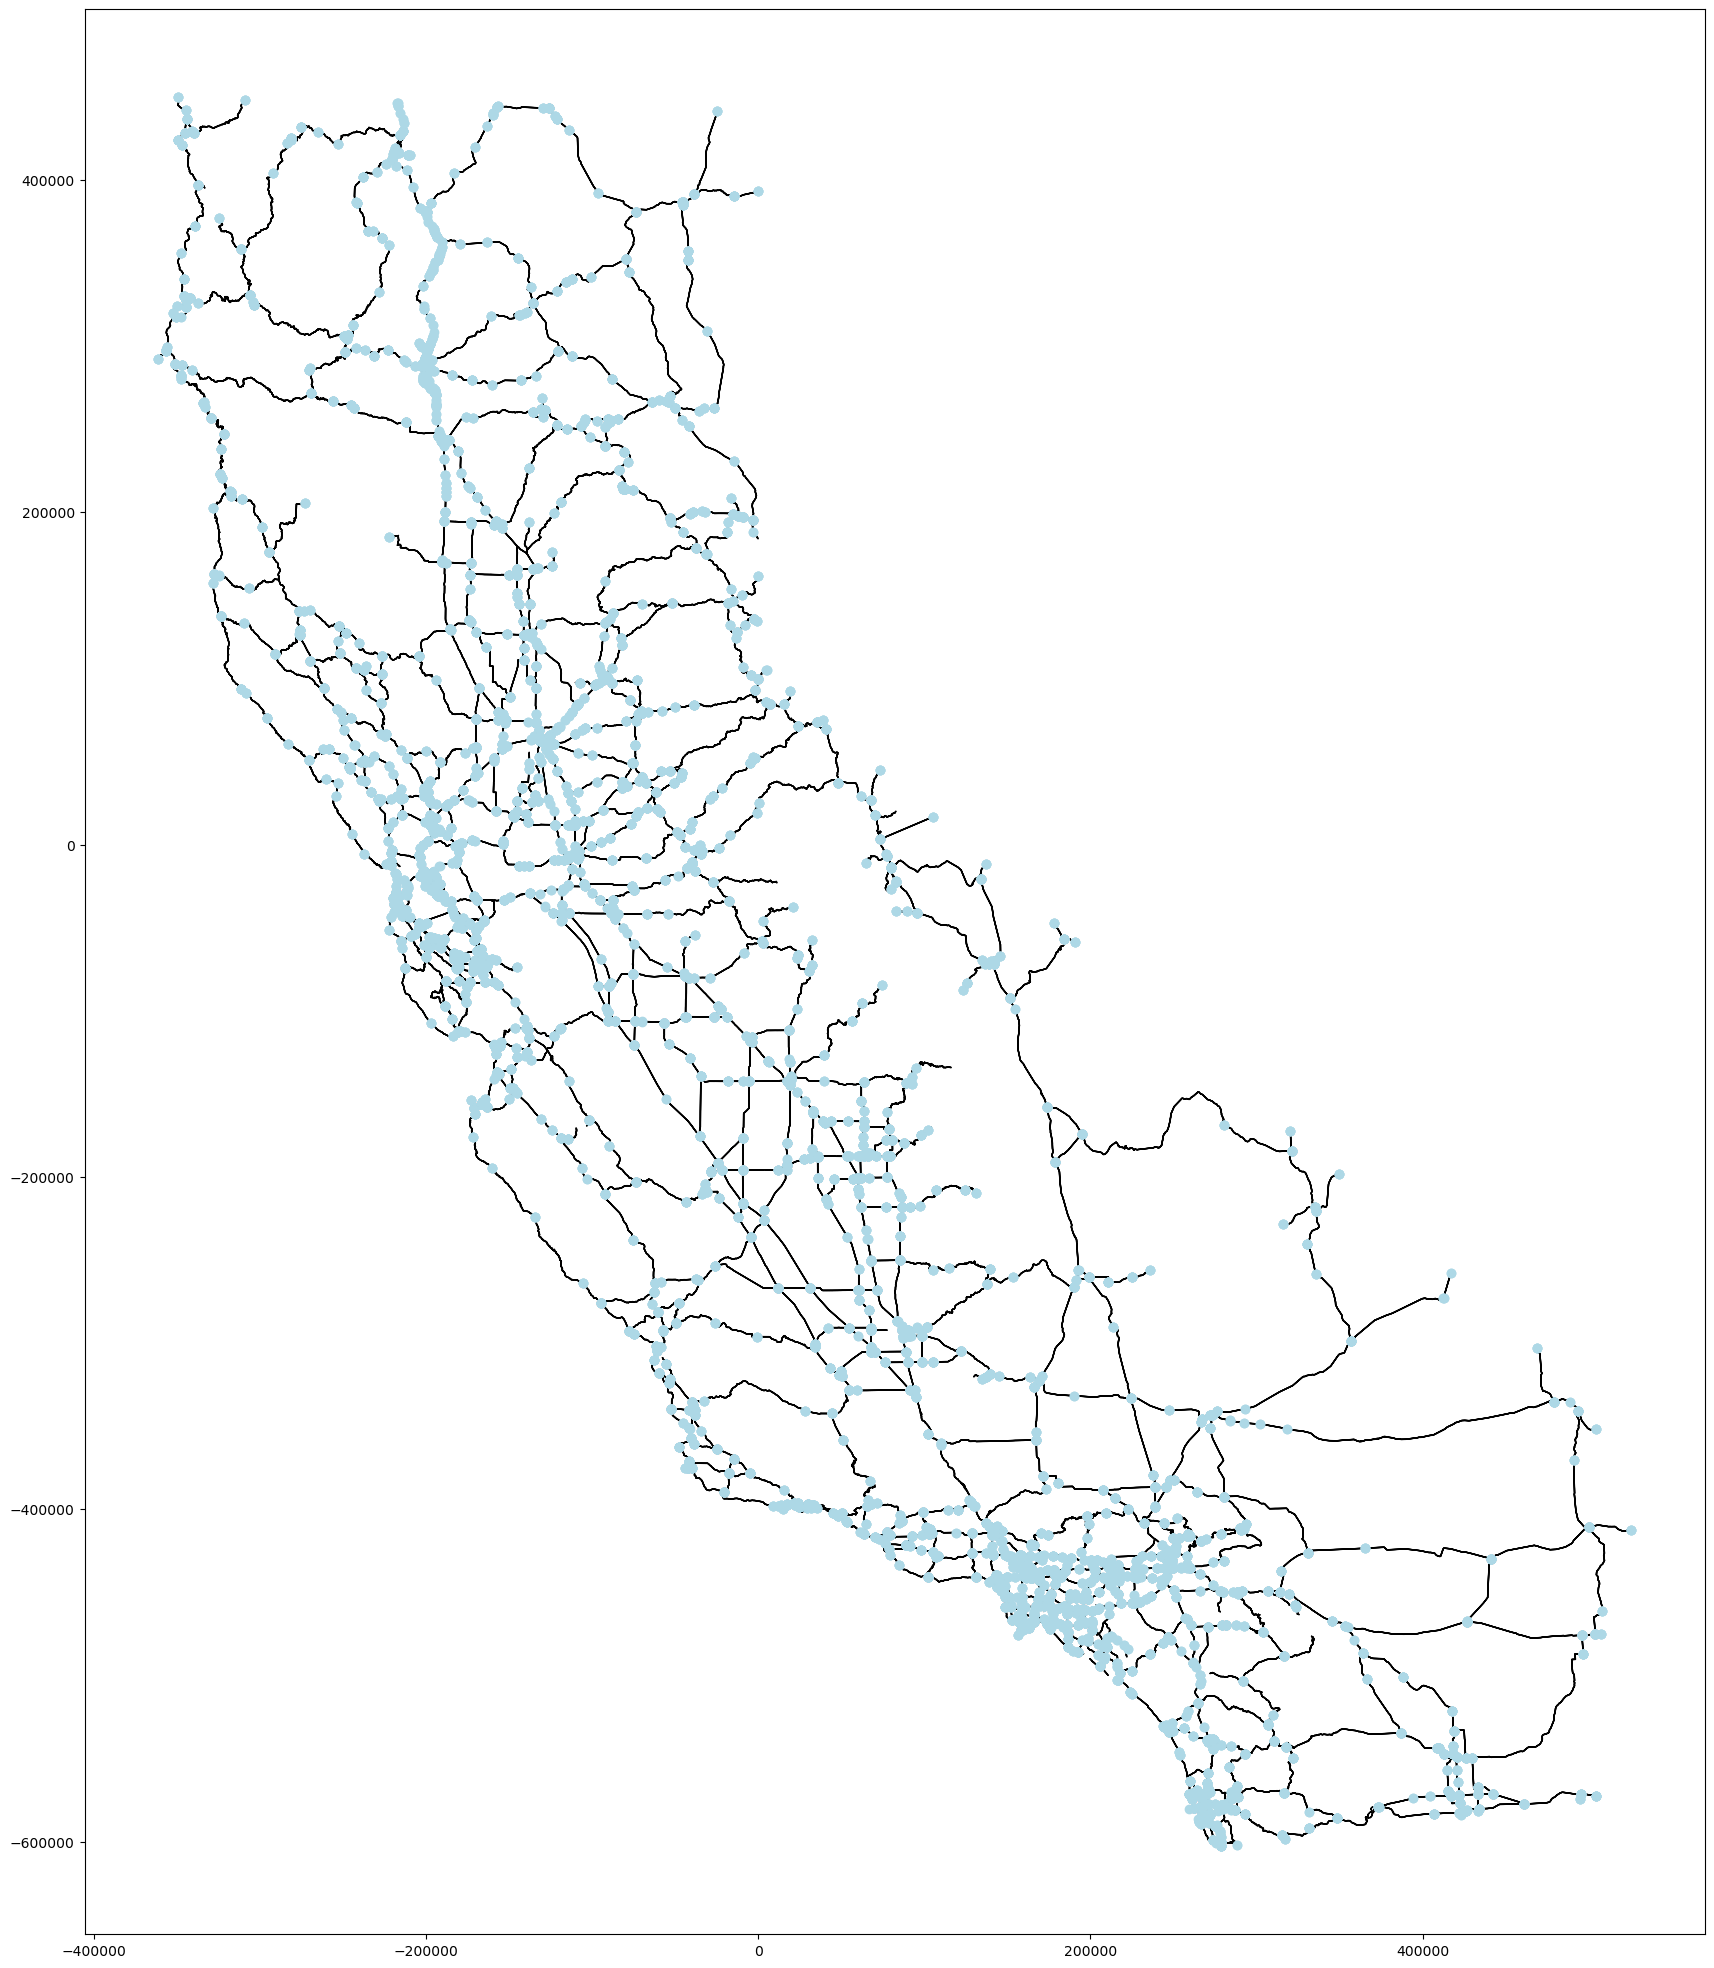

In [43]:
# lets plot to see for which link we get the copunt
fig, ax = plt.subplots(figsize = (30,25)) 
shs_proj.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
shs_aadt_joined.plot(color="lightblue",ax=ax) #Use your second dataframe

In [44]:
# Lets consider only qualified count
qualified_count_segment=shs_aadt_joined.loc[shs_aadt_joined['Qualified']==True]
qualified_count_segment.head()

,OBJECTID,RTE,RTE_SFX,DIST,CNTY,PM_PFX,POSTMILE,PM_SFX,LEG,DESCRIPTION,...,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,Qualified
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,R,0.129,1.077,None,0.0,0.948,Left,State,True
0,1,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,R,0.129,1.077,None,0.0,0.948,Right,State,True
1,2,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,R,0.129,1.077,None,0.0,0.948,Left,State,True
1,2,1,,12,ORA,R,0.129,,A,"DANA POINT, JCT. RTE. 5",...,12,R,0.129,1.077,None,0.0,0.948,Right,State,True
2,3,1,,12,ORA,R,0.78,,A,"DANA POINT, DOHENY PARK ROAD",...,12,R,0.129,1.077,None,0.0,0.948,Left,State,True


In [45]:
qualified_count_segment.columns

Index(['OBJECTID', 'RTE', 'RTE_SFX', 'DIST', 'CNTY', 'PM_PFX', 'POSTMILE',
       'PM_SFX', 'LEG', 'DESCRIPTION', 'VEHICLE_AADT_TOTAL', 'TOT_TRK_AADT',
       'TRK_PERCENT_TOT', 'TRK_2_AXLE', 'TRK_2_AXLE_PCT', 'TRK_3_AXLE',
       'TRK_3_AXLE_PCT', 'TRK_4_AXLE', 'TRK_4_AXLE_PCT', 'TRK_5_AXLE',
       'TRK_5_AXLE_PCT', 'EAL', 'EST_VER_YEAR', 'EST_VER_CODE', 'geometry',
       'index_right', 'id', 'shape_leng', 'route', 'rtesuffix', 'routes',
       'routeid', 'county', 'district', 'pmprefix', 'bpm', 'epm', 'pmsuffix',
       'bodometer', 'eodometer', 'aligncode', 'routetype', 'Qualified'],
      dtype='object')

In [52]:
qualified_count_segment['VEHICLE_AADT_TOTAL'] = pd.to_numeric(qualified_count_segment['VEHICLE_AADT_TOTAL'], errors='coerce')
qualified_count_segment['TOT_TRK_AADT'] = pd.to_numeric(qualified_count_segment['TOT_TRK_AADT'], errors='coerce')

# Assuming qualified_count_segment is your DataFrame with the required columns

# Group by relevant identifiers
grouped = qualified_count_segment.groupby(['id'])

# Aggregate to count AADT points and calculate statistics
summary = grouped.agg(
    aadt_count=('OBJECTID', 'count'),  # Count number of AADT points
    total_truck_aadt_mean=('TOT_TRK_AADT', 'mean'),  # Mean for BACK_AADT
    total_truck_aadt_min=('TOT_TRK_AADT', 'min'),    # Min for BACK_AADT
    total_truck_aadt_max=('TOT_TRK_AADT', 'max'),    # Max for BACK_AADT
    vehicle_aadt_mean=('VEHICLE_AADT_TOTAL', 'mean'),  # Mean for AHEAD_AADT
    vehicle_aadt_min=('VEHICLE_AADT_TOTAL', 'min'),    # Min for AHEAD_AADT
    vehicle_aadt_max=('VEHICLE_AADT_TOTAL', 'max')      # Max for AHEAD_AADT
).reset_index()

# Display the resulting summary DataFrame
summary.head()


C:\Users\s160555\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,aadt_count,total_truck_aadt_mean,total_truck_aadt_min,total_truck_aadt_max,vehicle_aadt_mean,vehicle_aadt_min,vehicle_aadt_max
0,xc453kn9742.1,4,3421.00,2450,4392,55500.0,50000,61000
1,xc453kn9742.1000,2,859.50,666,1053,9550.0,7400,11700
2,xc453kn9742.1001,2,341.00,341,341,7600.0,7600,7600
3,xc453kn9742.1002,8,1117.25,745,1531,49250.0,34500,61000
4,xc453kn9742.1003,2,24.00,24,24,1200.0,1200,1200


In [53]:
summary.shape

(2582, 8)

In [54]:
# Now bring the shs segment geometry with the process file
shs_link=shs_proj_link
shs_link.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,epm,pmsuffix,bodometer,eodometer,aligncode,routetype,geometry
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,8.147,None,8.425,10.969,Right,State,"MULTILINESTRING ((195970.763 -453881.549, 1960..."
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,49.420,None,41.613,91.033,Right,State,"MULTILINESTRING ((330353.418 -240641.285, 3303..."
2,xc453kn9742.3,0.141689,15,None,15,15_20080130_R,SBD,8,R,13.779,22.891,None,123.148,132.260,Right,Interstate,"MULTILINESTRING ((238606.843 -417929.525, 2385..."
3,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,0.273,None,0.000,0.273,Right,State,"MULTILINESTRING ((422959.785 -584084.468, 4229..."
4,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,27.086,None,257.761,284.847,Left,State,"MULTILINESTRING ((-89959.217 -78674.661, -8999..."


In [55]:
# add the segment geometry of the segment
shs_aadt_joined2=pd.merge(shs_link,summary, on=['id'], how='inner')
shs_aadt_joined2.head()

,id,shape_leng,route,rtesuffix,routes,routeid,county,district,pmprefix,bpm,...,aligncode,routetype,geometry,aadt_count,total_truck_aadt_mean,total_truck_aadt_min,total_truck_aadt_max,vehicle_aadt_mean,vehicle_aadt_min,vehicle_aadt_max
0,xc453kn9742.1,0.043795,90,None,90,90_20140130_R,ORA,12,None,5.603,...,Right,State,"MULTILINESTRING ((195970.763 -453881.549, 1960...",4,3421.0,2450,4392,55500.000000,50000,61000
1,xc453kn9742.2,0.746687,127,None,127,127_20080130_R,INY,9,None,0.000,...,Right,State,"MULTILINESTRING ((330353.418 -240641.285, 3303...",12,185.0,117,313,906.666667,340,1460
2,xc453kn9742.4,0.004341,111,None,111,111_20120130_R,IMP,11,R,0.000,...,Right,State,"MULTILINESTRING ((422959.785 -584084.468, 4229...",1,1116.0,1116,1116,31000.000000,31000,31000
3,xc453kn9742.5,0.426444,33,None,33,33_20140130_L,STA,10,None,0.000,...,Left,State,"MULTILINESTRING ((-89959.217 -78674.661, -8999...",2,437.0,437,437,4600.000000,4600,4600
4,xc453kn9742.17,0.019267,49,None,49,49_20120130_L,NEV,3,R,13.263,...,Left,State,"MULTILINESTRING ((-91070.96 131600.534, -91130...",2,851.0,851,851,22700.000000,22700,22700


In [56]:
shs_aadt_joined2.shape

(2582, 24)

<Axes: >

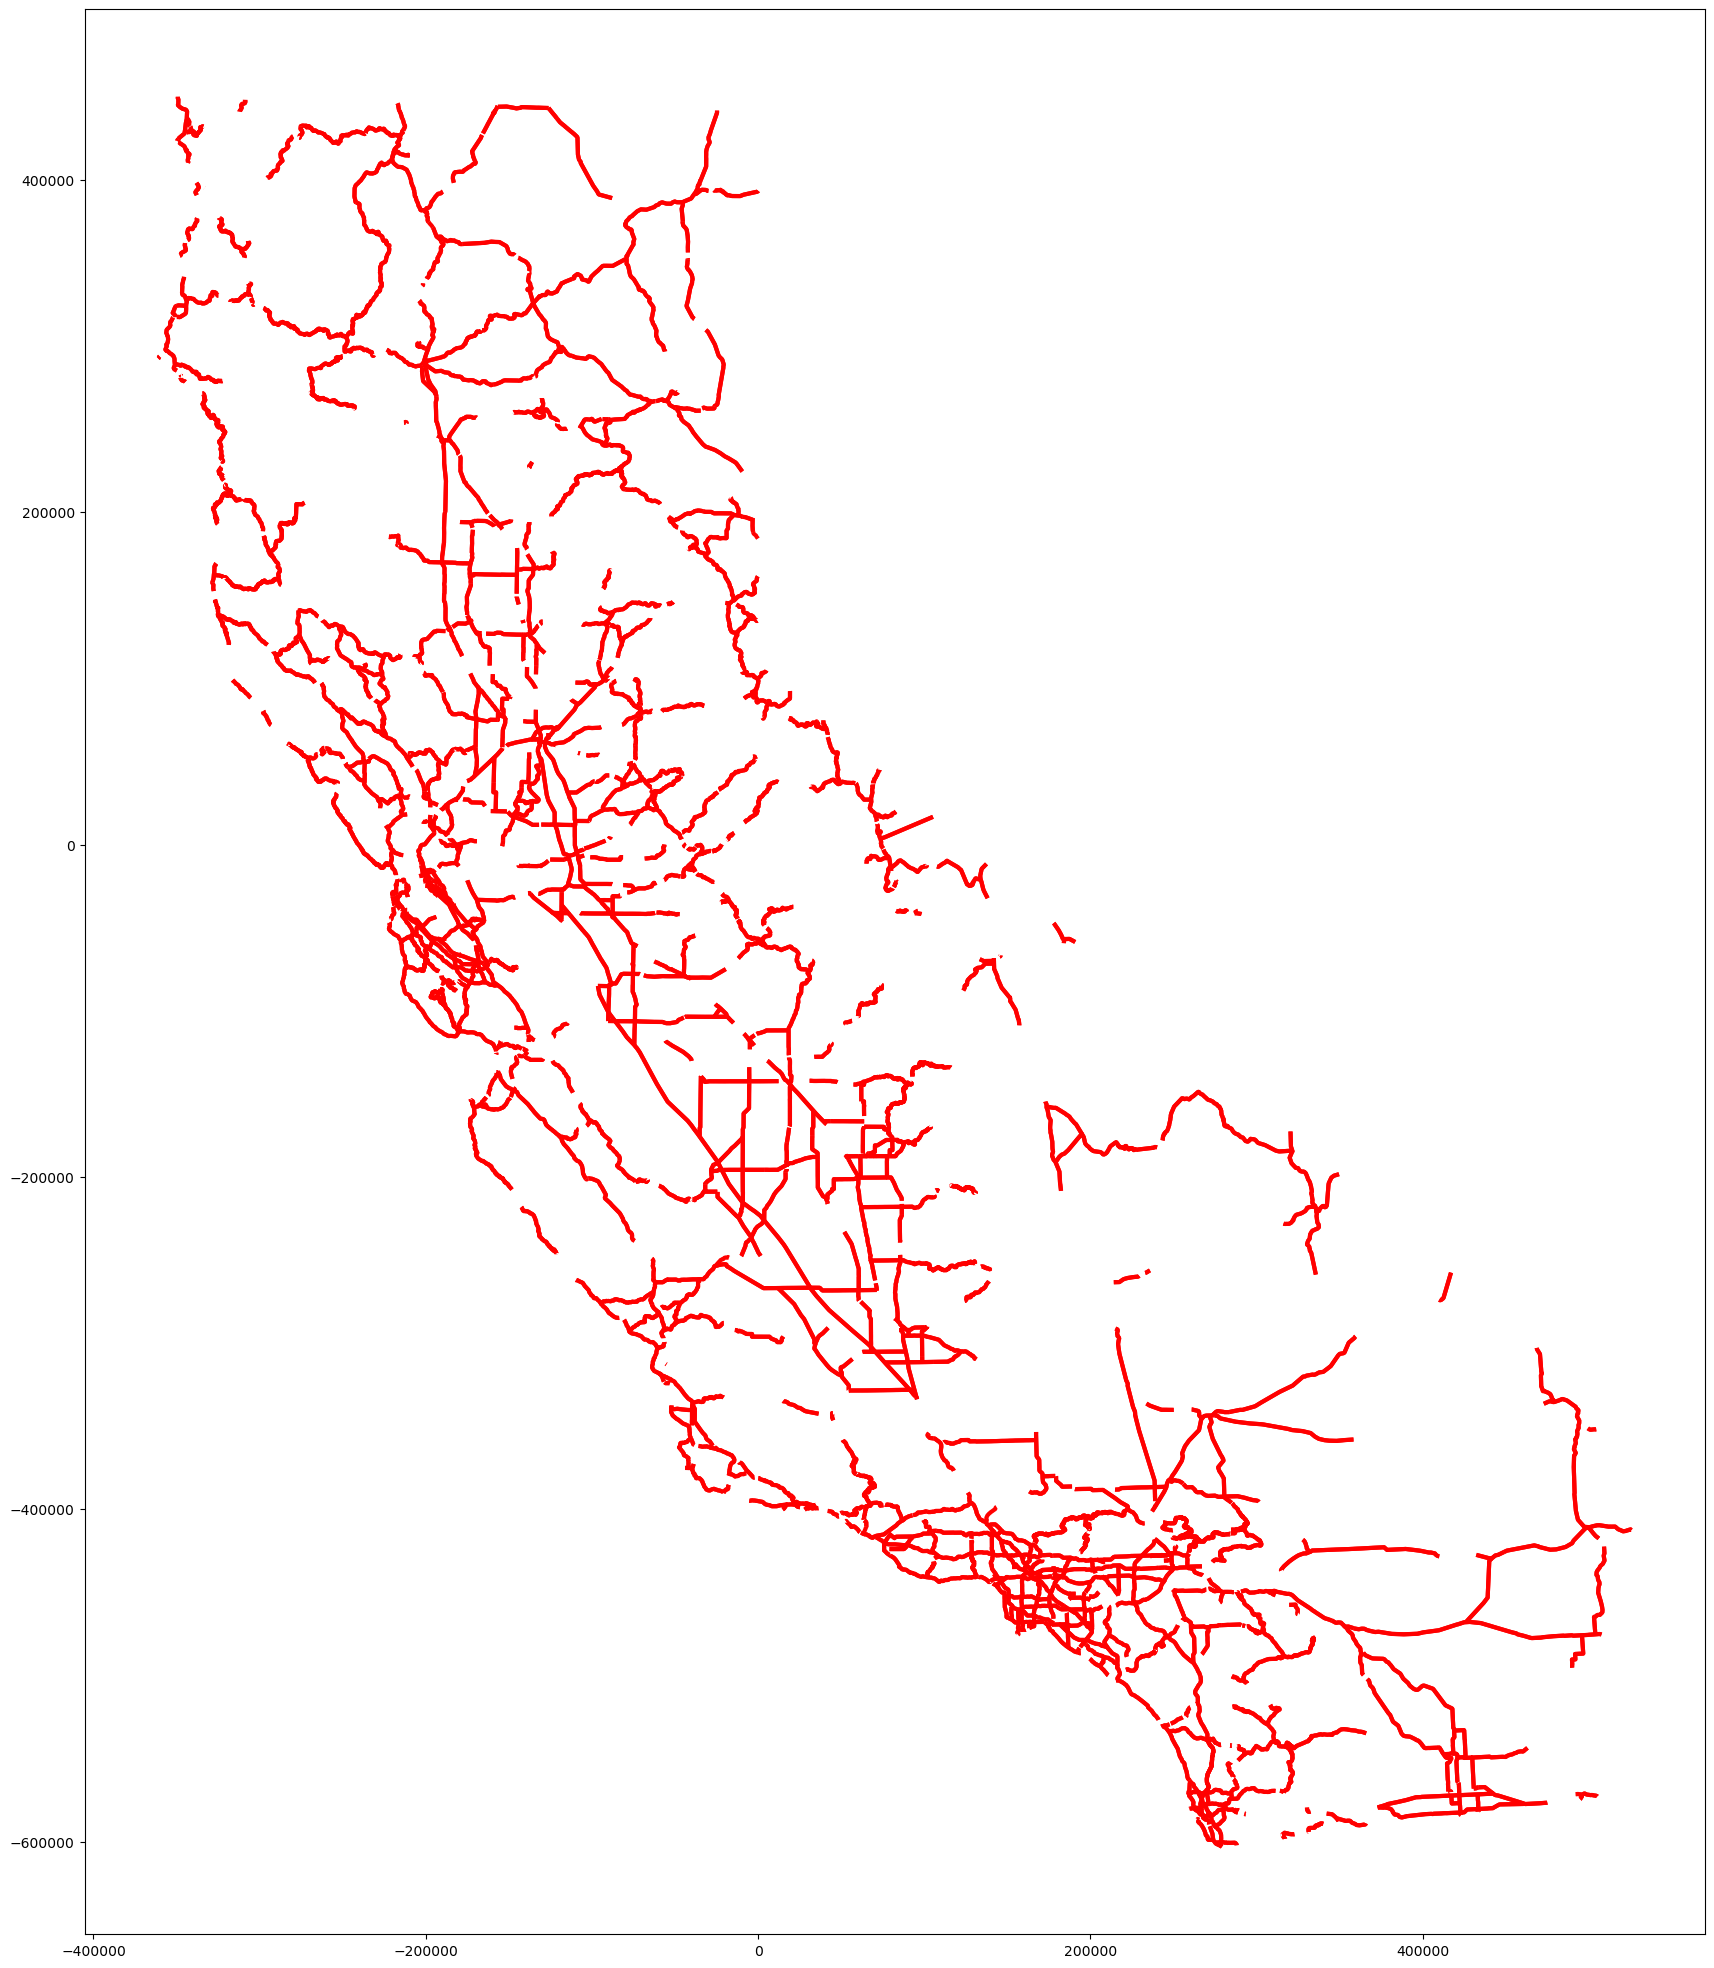

In [57]:
# lets plot to see for which link we get the copunt
fig, ax = plt.subplots(figsize = (30,25)) 
shs_aadt_joined2.plot(ax=ax,color="red",edgecolor='k',linewidth = 3)

In [58]:
summary_gdf = gpd.GeoDataFrame(shs_aadt_joined2, geometry='geometry', crs="EPSG:3310")
# Transform CRS to EPSG:4326
summary_gdf_4326 = summary_gdf.to_crs("EPSG:4326")
# Save as GeoJSON
crs = {'init': 'epsg:4326'}
final_data = gpd.GeoDataFrame(summary_gdf_4326, crs=crs, geometry = 'geometry')
final_data.to_file("link_level_truck_aadt_epsg_4326.json", driver="GeoJSON")

C:\Users\s160555\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\s160555\AppData\Local\anaconda3\envs\geo_env\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Infinite or NaN coordinate encountered
  ogr_write(


In [378]:
#end of the script